In [27]:
import pandas as pd
import numpy as np

In [28]:
import _pickle as cPickle
from pathlib import Path

def dumpPickle(fileName, content):
    pickleFile = open(fileName, 'wb')
    cPickle.dump(content, pickleFile, -1)
    pickleFile.close()

def loadPickle(fileName):    
    file = open(fileName, 'rb')
    content = cPickle.load(file)
    file.close()
    
    return content
    
def pickleExists(fileName):
    file = Path(fileName)
    
    if file.is_file():
        return True
    
    return False

In [29]:
wordPickleName = '../data/pickles/wordsDf.pkl'
df = loadPickle(wordPickleName)

In [30]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Architecturally,False,0,0,0.0,1,None,ADV,RB,advmod,Xxxxx
1,school,False,0,0,0.0,1,None,NOUN,NN,nsubj,xxxx
2,Catholic,False,0,0,0.0,1,NORP,None,None,None,Xxxxx
3,character,False,0,0,0.0,1,None,NOUN,NN,dobj,xxxx
4,Atop,False,0,0,1.0,1,None,ADP,IN,prep,Xxxx


In [31]:
df.isAnswer.value_counts()

False    14437
True       551
Name: isAnswer, dtype: int64

In [32]:
columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

In [33]:
for column in columnsToEncode:
    print(column)
    one_hot = pd.get_dummies(df[column])
    one_hot = one_hot.add_prefix(column + '_')

    df = df.drop(column, axis = 1)
    df = df.join(one_hot)

NER
POS
TAG
DEP


In [34]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,shape,NER_CARDINAL,NER_DATE,NER_EVENT,...,DEP_oprd,DEP_parataxis,DEP_pcomp,DEP_pobj,DEP_poss,DEP_predet,DEP_prep,DEP_prt,DEP_relcl,DEP_xcomp
0,Architecturally,False,0,0,0.0,1,Xxxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,school,False,0,0,0.0,1,xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Catholic,False,0,0,0.0,1,Xxxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character,False,0,0,0.0,1,xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Atop,False,0,0,1.0,1,Xxxx,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
columnsToDrop = ['text', 'titleId', 'paragrapghId', 'sentenceId', 'shape']

In [36]:
df = df.drop(columnsToDrop, axis = 1)

In [37]:
df.head()

,isAnswer,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,...,DEP_oprd,DEP_parataxis,DEP_pcomp,DEP_pobj,DEP_poss,DEP_predet,DEP_prep,DEP_prt,DEP_relcl,DEP_xcomp
0,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
from sklearn.model_selection import train_test_split

x_data = df.drop(labels=['isAnswer'], axis=1)
y_data = df['isAnswer']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)
df.head()

,isAnswer,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,...,DEP_oprd,DEP_parataxis,DEP_pcomp,DEP_pobj,DEP_poss,DEP_predet,DEP_prep,DEP_prt,DEP_relcl,DEP_xcomp
0,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

11990
11990
2998
2998


In [40]:
y_test.head()

7803     False
8971     False
3960     False
14021    False
2815     False
Name: isAnswer, dtype: bool

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [42]:
predictor = gnb.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

In [43]:
correctCount = (y_test == y_pred).sum()

print('Correctly guessed:', '{:.2f}%'.format((correctCount / len(y_test)) * 100))

Correctly guessed: 32.99%


In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 886, 2008],
       [   1,  103]], dtype=int64)

In [45]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

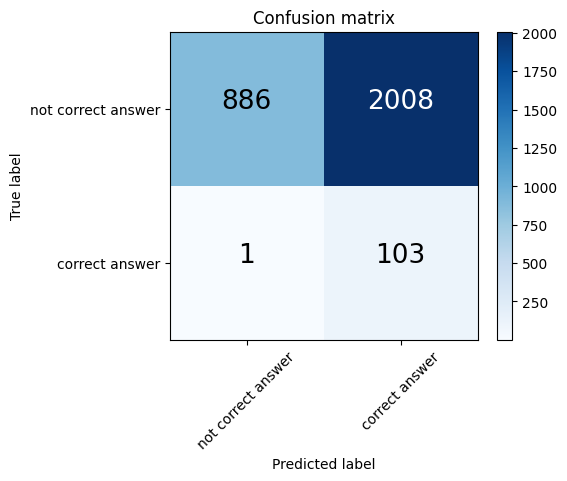

In [46]:
plot_confusion_matrix(y_test, y_pred, ['not correct answer', 'correct answer'], figsize=(5, 4))

In [47]:
y_test.value_counts()

False    2894
True      104
Name: isAnswer, dtype: int64

TF-IDF, KNN

In [48]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.feature_extraction.text import TfidfVectorizer

# clf = Pipeline([
#     ('vectorizer_tfidf',TfidfVectorizer()),
#     ('KNN', KNeighborsClassifier())
# ])

# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print(classification_report(y_test, y_pred))

Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8098732488325551
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.81      0.89      2883
        True       0.14      0.78      0.24       115

    accuracy                           0.81      2998
   macro avg       0.57      0.80      0.57      2998
weighted avg       0.96      0.81      0.87      2998



In [50]:
predictorPickleName = '../data/pickles/nb-predictor.pkl'
dumpPickle(predictorPickleName, predictor)


predictorFeaturesName = '../data/pickles/nb-predictor-features.pkl'
dumpPickle(predictorFeaturesName, list(df.columns))